In [2]:
import numpy as np
import matplotlib.pyplot as plt



In [3]:
#implement function taking X and K, that returns Phi(X)
#of shape NxK, which is the vandermore matrix associated with X

def vandermore(X, K):
    N=X.shape[0]
    phi=np.zeros((N,K))
    for j in range(K):
        phi[:,j]=X**j
    return phi

#X=np.random.randn(10,10)
X=[1,2,3,4]
X=np.array(X)
phi=vandermore(X, K=5)
print(phi)


[[  1.   1.   1.   1.   1.]
 [  1.   2.   4.   8.  16.]
 [  1.   3.   9.  27.  81.]
 [  1.   4.  16.  64. 256.]]


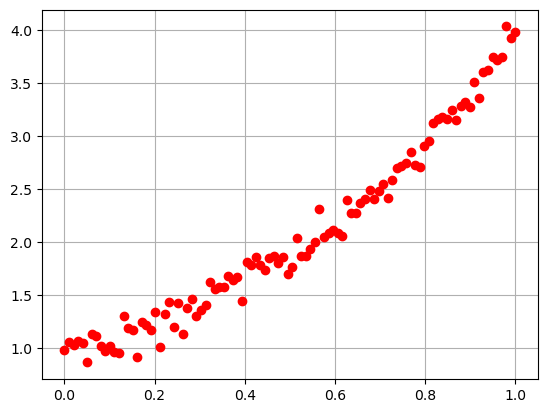

In [13]:
#create test problem
N=100 #n. of datapoints
K=4

a=0
b=1
#define true solution
theta_true=np.ones((K,))
X=np.linspace(a,b,N) #100 values equispaced from 0 to 1
#define Y such that theta_true is the solution of
#Phi(X)*theta=Y
phi=vandermore(X, K)
Y = phi @ theta_true 

#corrupt Y with noise (standard normal distribution with sigma=0.1)
sigma=0.1
Y=Y+sigma*np.random.normal(0,1,Y.shape)

#plot X against Y with red dots
plt.plot(X,Y, "o", color="red")
plt.grid()



(100, 4)


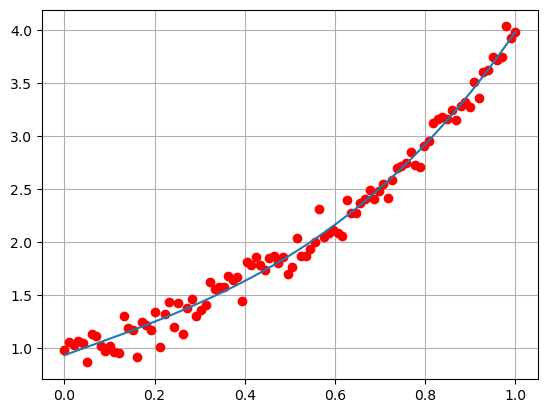

In [30]:
#given x and y compute a solution theta_mle
#print(np.linalg.inv(phi.T@phi)@phi.T@Y) #not efficient
theta_mle= np.linalg.solve(phi.T@phi, phi.T@Y) #using LU factiorization, more efficient
#the best is using cholesky 
#plot f_theta(X)
XX=np.linspace(a,b,1000)
YY=vandermore(XX,K)@theta_mle
plt.plot(X,Y, "ro")
print(phi.shape)
#f_theta=phi@theta_mle
plt.plot(XX,YY)
plt.grid()



## UNDERFITTING

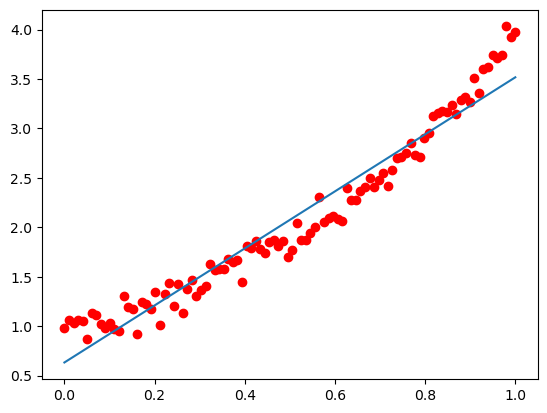

In [34]:
#we now want to UNDERFIT the model
#X and Y are fixed
#pretend to not know K -> we guess it
K_trial= 2
#solve MLE with K_trial=2
phi_trial=vandermore(X, K_trial)
theta_mle_t=np.linalg.solve(phi_trial.T@phi_trial, phi_trial.T@Y)
#plot new model as before with dataset
plt.plot(X,Y, "ro")
plt.plot(X, phi_trial@theta_mle_t)
plt.grid()

## OVERFITTING

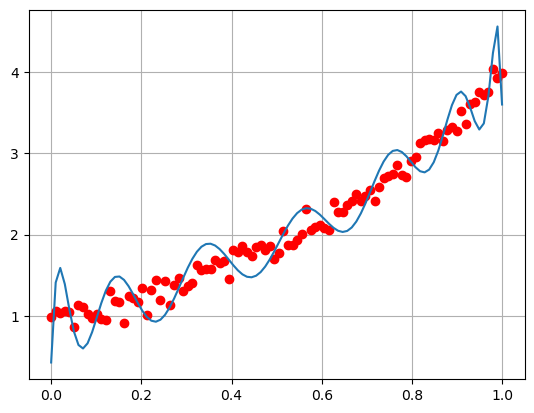

In [46]:
#we now want to UNDERFIT the model
#X and Y are fixed
#pretend to not know K -> we guess it
K_trial= 20
#solve MLE with K_trial=2
phi_trial=vandermore(X, K_trial)
theta_mle_t=np.linalg.solve(phi_trial.T@phi_trial, phi_trial.T@Y)
#plot new model as before with dataset
plt.plot(X,Y, "ro")
plt.plot(X, phi_trial@theta_mle_t)
plt.grid()

#overfitting strongly depends on K, but also really depends on N (the bigger the N, the more difficult is to overfit)

# MAP (maximum a posteriori)

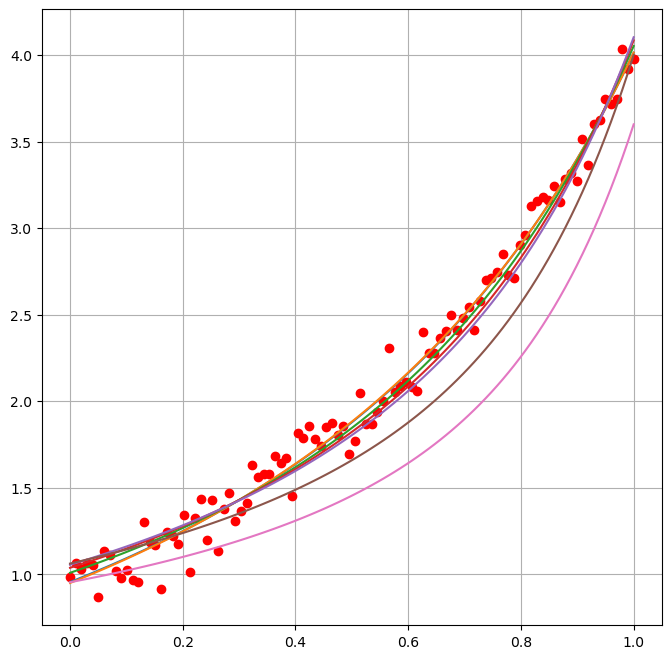

In [86]:
#set lambda, ofc don't call it lambda
#we can ignore k and change lambda
#for lambda too big we underfit, but underfitting is way easier to spot than overfit
l_val=[0.1,.05,1,2,3,15,40]
#set K_trial
K_trial=10
plt.figure(figsize=(8,8))
plt.plot(X,Y, "ro")

for l in l_val:
    #compute vandermore
    phi=vandermore(X,K_trial)
    #solve theta_map
    theta_map=np.linalg.solve(phi.T@phi+l*np.identity(K_trial),phi.T@Y)

    #plot
    plt.plot(X, phi@theta_map)
plt.grid()

#usially lambda is a default paraeter almost never changed
